In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
import os
import matplotlib.pyplot as plt
from striatum.bandit import ucb1
from utils.data import *
from utils.policy import *
plt.style.use('seaborn')

The dataset can be downloaded from https://webscope.sandbox.yahoo.com/catalog.php?datatype=r&did=49&guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAKMpFabCynQaqELiF-ZRETf9Kpgo8sRfLS4oZz8cK1_F1eL6ODhz2D2vnkqVKUQc8HwUPn6aCMXmD1swmbAAnpRpw3wUb6BlnV831euii00v5_8XDTWz37V95ydrcG5BayM3mdqGycB5c2LeH03dX0Tz5FlKjNhkS1833qKWxaax.

In [3]:
DATA_DIR = os.path.abspath('../../Data/yahoo!_front_page_today_module_user_click_log/R6')
DATA_FILE_NAMES = ['ydata-fp-td-clicks-v1_0.2009050{}.gz'.format(str(d + 3)) for d in range(7)]
MODEL_DIR = os.path.abspath('models')

In [4]:
data_paths = []
for data_file in DATA_FILE_NAMES:
    data_paths.append(os.path.join(DATA_DIR, data_file))

In [5]:
policy_learner = PolicyLearner(ucb1.UCB1, seed=0, reset_freq=1000000)
param_grid = {'data_size': [0.01, 0.05, 0.1, 0.2, 0.3, 1.0]}

In [6]:
res = search_param(policy_learner, param_grid, parse_data, data_paths=data_paths)

Parameters: {'data_size': 0.01} | Average Reward: 3.8559% | Computation Time: 2:41:25
Parameters: {'data_size': 0.05} | Average Reward: 4.2268% | Computation Time: 2:44:36
Parameters: {'data_size': 0.1} | Average Reward: 4.1464% | Computation Time: 3:28:02
Parameters: {'data_size': 0.2} | Average Reward: 4.2165% | Computation Time: 3:29:33
Parameters: {'data_size': 0.3} | Average Reward: 4.3314% | Computation Time: 4:11:33
Parameters: {'data_size': 1.0} | Average Reward: 4.5450% | Computation Time: 5:44:50


In [7]:
if not os.path.isdir(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
with open(os.path.join(MODEL_DIR, 'model_ucb1.pkl'), 'wb') as file:
    pickle.dump(res, file)

In [9]:
with open(os.path.join(MODEL_DIR, 'model_ucb1.pkl'), 'rb') as file:
    res = pickle.load(file)

Best Parameter: {'data_size': 1}
Cumulative CTR: 4.5450%


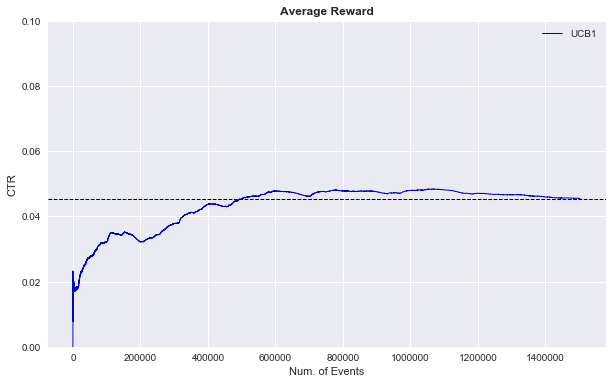

In [10]:
best_param = res['param'][np.argmax(res['avg_reward'])]
cum_ctr = np.max(res['avg_reward'])
print('Best Parameter: {0}\nCumulative CTR: {1:0.4%}'.format(best_param, cum_ctr))
fig, ax = plt.subplots(figsize=(10, 6))
_ = ax.plot(res['seq_avg_reward'][np.argmax(res['avg_reward'])], color='mediumblue', label='UCB1', linewidth=1)
ax.axhline(y=cum_ctr, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Num. of Events')
ax.set_ylabel('CTR')
ax.set_ylim([0.0, 0.1])
ax.legend(loc='best')
_ = ax.set_title('Average Reward', fontsize=12, fontweight='bold')